Нонограмма

Сделать решатель нонограммы, и получите эмблему PP, из сериала кремневая долина.

Японский кроссворд (по-другому нонограмма) — это головоломка, в которой зашифровано изображение

Дается поле с горизонатальными и вертикальными подсказками. Эти подсказки указывают количество клеток, которые надо закрасить, в столбце - при горизонтальных подсказках, в строке - при вертикальных. Если в подсказке одно число  n, то это значит, что надо закрасить n клеток подряд. Если несколько чисел, к примеру два числа n и k, то это значит что надо сначала закрасить n клеток подряд, потом должен быть хотябы один пробел, после чего закрашиваем  k клеток подряд. 

Задача закрасить клетки так, чтобы количество все подсказки сходились. 
 
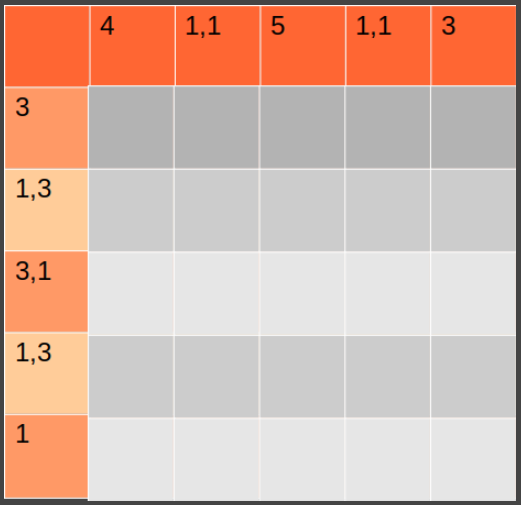

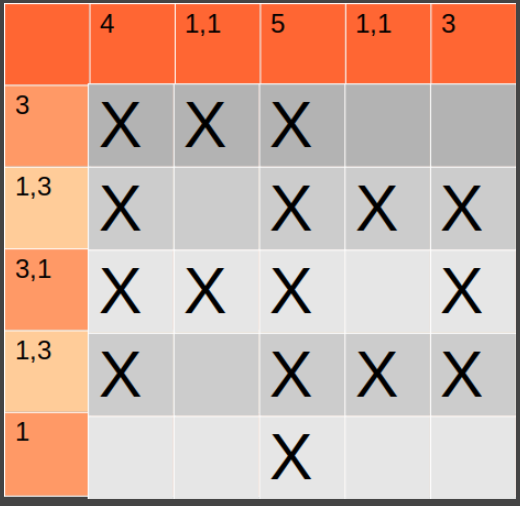

Ваша задача написать решатель нонограммы размером 5 на 5.

Потренироваться в решении нонограмм можно тут: https://www.puzzle-nonograms.com/

Входные данные:  сначала горизонтальные подсказки, потом вертикальные

При горизонтальных подсказках, если пишется несколько цифр, то сначала написано количество закрашенных клеток, что расположены выше, потом ниже

При вертикальных, сначала слева, потом справа

Пример входных данных: 

4

1,1

5

1,1

3

 

3

1,3

3,1

1,3

1

Выходные данные: получившаяся картинка записанная в строчку, в пикселях, где X - это буквы эмблемы, пустое пространство обозначается прочерком - 

Пример выходных данных: 

XXX--

X-XXX

XXX-X

X-XXX

--X--

In [ ]:
import sys

output = []
for line in sys.stdin:
    line = line.strip()
    line = list(line.split(','))
    output.append(line)

text = []
for elem in output:
    if elem != ['']:
        elem = [int(i) for i in elem]
        text.append(elem)

from itertools import product, groupby
from collections import defaultdict

def vec_to_spec(v):
    return tuple(len(list(g)) for k,g in groupby(v) if k)

def build_specs(n=5):
    specs = defaultdict(list)
    for v in product([0,1], repeat=n):
        specs[vec_to_spec(v)].append(v)
    return specs

def check(rowvecs, row_counts, col_counts):
    colvecs = zip(*rowvecs)
    row_pass = all(vec_to_spec(r) == tuple(rc) for r,rc in zip(rowvecs, row_counts))
    col_pass = all(vec_to_spec(r) == tuple(rc) for r,rc in zip(colvecs, col_counts))
    return row_pass and col_pass

def nonosolve(row_counts, col_counts): 
    specs = build_specs(len(row_counts))
    possible_rows = [specs[tuple(r)] for r in row_counts]
    sols = []
    for poss in product(*possible_rows):
        if check(poss, row_counts, col_counts):
            sols.append(poss)
    return sols

cols = text[:5]
rows = text[5:]
result = nonosolve(rows, cols)

new_list = []
for row in result[0]:
    new_list.append(list(row))

for row in new_list:
    for i in range(5):
        if row[i] == 1.0:
            row[i] = 'X'
        else:
            row[i] = '-'

for_print = []
for row in new_list:
    row = ''.join(row)
    for_print.append(row)

print(*for_print, sep='\n')